In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_10per_ori_train='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/train_dof8_ori_base_25000k_10per.csv'
data_10per_ori_test='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_ori_base_25000k_10per.csv'
data_10per_09k1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k1_25000k_10per.csv'
data_10per_09k3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k3_25000k_10per.csv'
data_10per_09k5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k5_25000k_10per.csv'
data_10per_09k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k7_25000k_10per.csv'
data_10per_085k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_085k7_25000k_10per.csv'
data_10per_09k3k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k3k7_25000k_10per.csv'
data_10per_09k2k8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k2k8_25000k_10per.csv'

import sys
sys.path.insert(0,'/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/4DOF_system')
from evaluation import r2, MSE, CV, corr
from testing import*

In [5]:
# f18 means the force is at Loc1&8
f18_10per_ori_train=pd.read_csv(data_10per_ori_train,header=None).values

f18_10per_ori_test=pd.read_csv(data_10per_ori_test,header=None).values
f18_10per_09k1=pd.read_csv(data_10per_09k1,header=None).values
f18_10per_09k3=pd.read_csv(data_10per_09k3,header=None).values
f18_10per_09k5=pd.read_csv(data_10per_09k5,header=None).values
f18_10per_09k7=pd.read_csv(data_10per_09k7,header=None).values
f18_10per_085k7=pd.read_csv(data_10per_085k7,header=None).values
f18_10per_09k3k7=pd.read_csv(data_10per_09k3k7,header=None).values
f18_10per_09k2k8=pd.read_csv(data_10per_09k2k8,header=None).values

In [6]:
# Train data
print(f18_10per_ori_train.shape)
# The shape means (100ceps, 400realizations*8dof)

# Test data
f18_10per_09k1.shape
# The shape means (100ceps, 200realizations*8dof)

(100, 3200)


(100, 1600)

# **Extract each dof's data for training and testing**

In [7]:
# Function for extract each DOF data
def extract(data, num_rel, start, end):
  num=end-start
  dof1=data[start:end,num_rel*0:num_rel*1].T
  dof2=data[start:end,num_rel*1:num_rel*2].T
  dof3=data[start:end,num_rel*2:num_rel*3].T
  dof4=data[start:end,num_rel*3:num_rel*4].T
  dof5=data[start:end,num_rel*4:num_rel*5].T
  dof6=data[start:end,num_rel*5:num_rel*6].T
  dof7=data[start:end,num_rel*6:num_rel*7].T
  dof8=data[start:end,num_rel*7:num_rel*8].T

  return dof1, dof2, dof3, dof4, dof5, dof6, dof7, dof8


In [8]:
# Extract 8dofs undamaged training data first
start=1
end=51
num_rel_train=400
(ori_10per_dof1_train,
ori_10per_dof2_train,
ori_10per_dof3_train,
ori_10per_dof4_train,
ori_10per_dof5_train, 
ori_10per_dof6_train, 
ori_10per_dof7_train, 
ori_10per_dof8_train)=extract(f18_10per_ori_train, num_rel_train, start, end)

In [9]:
# Check dimension of the extracted training data
ori_10per_dof1_train.shape

(400, 50)

In [10]:
# Extract the testing data, including undamaged and damaged ones:
num_rel_test=200
# for undamaged case
(ori_10per_dof1_test,
ori_10per_dof2_test,
ori_10per_dof3_test,
ori_10per_dof4_test,
ori_10per_dof5_test, 
ori_10per_dof6_test, 
ori_10per_dof7_test, 
ori_10per_dof8_test)=extract(f18_10per_ori_test, num_rel_test, start, end)

# For damaged k1=0.9k0 case
(dam09k1_10per_dof1_test,
dam09k1_10per_dof2_test,
dam09k1_10per_dof3_test,
dam09k1_10per_dof4_test,
dam09k1_10per_dof5_test, 
dam09k1_10per_dof6_test, 
dam09k1_10per_dof7_test, 
dam09k1_10per_dof8_test)=extract(f18_10per_09k1, num_rel_test, start, end)

# For damaged k3=0.9k0 case
(dam09k3_10per_dof1_test,
dam09k3_10per_dof2_test,
dam09k3_10per_dof3_test,
dam09k3_10per_dof4_test,
dam09k3_10per_dof5_test, 
dam09k3_10per_dof6_test, 
dam09k3_10per_dof7_test, 
dam09k3_10per_dof8_test)=extract(f18_10per_09k3, num_rel_test, start, end)

# For damaged k5=0.9k0 case
(dam09k5_10per_dof1_test,
dam09k5_10per_dof2_test,
dam09k5_10per_dof3_test,
dam09k5_10per_dof4_test,
dam09k5_10per_dof5_test, 
dam09k5_10per_dof6_test, 
dam09k5_10per_dof7_test, 
dam09k5_10per_dof8_test)=extract(f18_10per_09k5, num_rel_test, start, end)

# For damaged k7=0.9k0 case
(dam09k7_10per_dof1_test,
dam09k7_10per_dof2_test,
dam09k7_10per_dof3_test,
dam09k7_10per_dof4_test,
dam09k7_10per_dof5_test, 
dam09k7_10per_dof6_test, 
dam09k7_10per_dof7_test, 
dam09k7_10per_dof8_test)=extract(f18_10per_09k7, num_rel_test, start, end)

# For damaged k7=0.85k0 case
(dam085k7_10per_dof1_test,
dam085k7_10per_dof2_test,
dam085k7_10per_dof3_test,
dam085k7_10per_dof4_test,
dam085k7_10per_dof5_test, 
dam085k7_10per_dof6_test, 
dam085k7_10per_dof7_test, 
dam085k7_10per_dof8_test)=extract(f18_10per_085k7, num_rel_test, start, end)

# For damaged k3k7=0.9k0 case
(dam09k3k7_10per_dof1_test,
dam09k3k7_10per_dof2_test,
dam09k3k7_10per_dof3_test,
dam09k3k7_10per_dof4_test,
dam09k3k7_10per_dof5_test, 
dam09k3k7_10per_dof6_test, 
dam09k3k7_10per_dof7_test, 
dam09k3k7_10per_dof8_test)=extract(f18_10per_09k3k7, num_rel_test, start, end)

# For damaged k2k8=0.9k0 case
(dam09k2k8_10per_dof1_test,
dam09k2k8_10per_dof2_test,
dam09k2k8_10per_dof3_test,
dam09k2k8_10per_dof4_test,
dam09k2k8_10per_dof5_test, 
dam09k2k8_10per_dof6_test, 
dam09k2k8_10per_dof7_test, 
dam09k2k8_10per_dof8_test)=extract(f18_10per_09k2k8, num_rel_test, start, end)

# **Next, normalization**

In [11]:
# First, get the combined training data to obtain the normalization scale (max and min):
combine=np.vstack((ori_10per_dof1_train,ori_10per_dof2_train))
combine=np.vstack((combine,ori_10per_dof3_train))
combine=np.vstack((combine,ori_10per_dof4_train))
combine=np.vstack((combine,ori_10per_dof5_train))
combine=np.vstack((combine,ori_10per_dof6_train))
combine=np.vstack((combine,ori_10per_dof7_train))
combine=np.vstack((combine,ori_10per_dof8_train))
target_train=combine
# Note: combine is used for normalization scale, and the target_train is used for obtaining the normalized training data!

In [12]:
target_train.shape

(3200, 50)

In [13]:
# Define normalization function
def norm(target,combine_train):
  norm_data=(target-np.min(combine_train))/(np.max(combine_train)-np.min(combine_train))
  return norm_data

In [14]:
norm_train=norm(target_train,combine)
norm_train.shape

(3200, 50)

In [15]:
# Next, shuffle the norm_train as a new variable for training only!
for_training=np.array(norm_train,copy=True)
# Then shuffle
np.random.shuffle(for_training)

In [16]:
# Next, normalize the undamaged testing data
norm_ori_dof1_test=norm(ori_10per_dof1_test,combine);
norm_ori_dof2_test=norm(ori_10per_dof2_test,combine)
norm_ori_dof3_test=norm(ori_10per_dof3_test,combine)
norm_ori_dof4_test=norm(ori_10per_dof4_test,combine)
norm_ori_dof5_test=norm(ori_10per_dof5_test,combine)
norm_ori_dof6_test=norm(ori_10per_dof6_test,combine)
norm_ori_dof7_test=norm(ori_10per_dof7_test,combine)
norm_ori_dof8_test=norm(ori_10per_dof8_test,combine)

# Then, let's choose the damaged case 1: k1=0.9k0 scenario for analysis:
norm_09k1_dof1_test=norm(dam09k1_10per_dof1_test,combine);
norm_09k1_dof2_test=norm(dam09k1_10per_dof2_test,combine)
norm_09k1_dof3_test=norm(dam09k1_10per_dof3_test,combine)
norm_09k1_dof4_test=norm(dam09k1_10per_dof4_test,combine)
norm_09k1_dof5_test=norm(dam09k1_10per_dof5_test,combine)
norm_09k1_dof6_test=norm(dam09k1_10per_dof6_test,combine)
norm_09k1_dof7_test=norm(dam09k1_10per_dof7_test,combine)
norm_09k1_dof8_test=norm(dam09k1_10per_dof8_test,combine)

In [17]:
# Check dimension:
print(norm_ori_dof1_test.shape)
print(norm_09k1_dof1_test.shape)

(200, 50)
(200, 50)


**Next, prepare the ground truth for GAE, where it should be a combination of the other 7 DOFs' cepstral coefficients**

In [18]:
norm_ori_dof1_train=norm_train[0:num_rel_train,:];
norm_ori_dof2_train=norm_train[1*num_rel_train:2*num_rel_train,:];
norm_ori_dof3_train=norm_train[2*num_rel_train:3*num_rel_train,:];
norm_ori_dof4_train=norm_train[3*num_rel_train:4*num_rel_train,:];
norm_ori_dof5_train=norm_train[4*num_rel_train:5*num_rel_train,:];
norm_ori_dof6_train=norm_train[5*num_rel_train:6*num_rel_train,:];
norm_ori_dof7_train=norm_train[6*num_rel_train:7*num_rel_train,:];
norm_ori_dof8_train=norm_train[7*num_rel_train:8*num_rel_train,:];

cc=end-start
reshape_norm_train=np.zeros((num_rel_train,cc,8))
for i in range(8):
  reshape_norm_train[:,:,i]=norm_train[num_rel_train*i:num_rel_train*(i+1),:]
# Set ground truth for DOF1-DOF8, and make a copy for each DOF for later shuffle
gaet_ori_dof1_train=np.delete(reshape_norm_train,0,2) # delete the dof1's CCs
cpgaet_ori_dof1_train=np.array(gaet_ori_dof1_train,copy=True); np.random.shuffle(cpgaet_ori_dof1_train)

gaet_ori_dof2_train=np.delete(reshape_norm_train,1,2) # delete the dof2's CCs
cpgaet_ori_dof2_train=np.array(gaet_ori_dof2_train,copy=True); np.random.shuffle(cpgaet_ori_dof2_train)

gaet_ori_dof3_train=np.delete(reshape_norm_train,2,2) # delete the dof3's CCs
cpgaet_ori_dof3_train=np.array(gaet_ori_dof3_train,copy=True); np.random.shuffle(cpgaet_ori_dof3_train)

gaet_ori_dof4_train=np.delete(reshape_norm_train,3,2) # delete the dof4's CCs
cpgaet_ori_dof4_train=np.array(gaet_ori_dof4_train,copy=True); np.random.shuffle(cpgaet_ori_dof4_train)

gaet_ori_dof5_train=np.delete(reshape_norm_train,4,2) # delete the dof5's CCs
cpgaet_ori_dof5_train=np.array(gaet_ori_dof5_train,copy=True); np.random.shuffle(cpgaet_ori_dof5_train)

gaet_ori_dof6_train=np.delete(reshape_norm_train,5,2) # delete the dof6's CCs
cpgaet_ori_dof6_train=np.array(gaet_ori_dof6_train,copy=True); np.random.shuffle(cpgaet_ori_dof6_train)

gaet_ori_dof7_train=np.delete(reshape_norm_train,6,2) # delete the dof7's CCs
cpgaet_ori_dof7_train=np.array(gaet_ori_dof7_train,copy=True); np.random.shuffle(cpgaet_ori_dof7_train)

gaet_ori_dof8_train=np.delete(reshape_norm_train,7,2) # delete the dof8's CCs
cpgaet_ori_dof8_train=np.array(gaet_ori_dof8_train,copy=True); np.random.shuffle(cpgaet_ori_dof8_train)

In [19]:
reshape_norm_train.shape
gaet_ori_dof1_train.shape

(400, 50, 7)

In [20]:
# Finally, combine the gaet of each dof into one matrix in original order
gaet_train=np.zeros((num_rel_train*8,cc,7));
shuffle_gaet_train=np.zeros((num_rel_train*8,cc,7));

gaet_train[0:num_rel_train,:,:]=gaet_ori_dof1_train
gaet_train[num_rel_train*1:num_rel_train*2,:,:]=gaet_ori_dof2_train
gaet_train[num_rel_train*2:num_rel_train*3,:,:]=gaet_ori_dof3_train
gaet_train[num_rel_train*3:num_rel_train*4,:,:]=gaet_ori_dof4_train
gaet_train[num_rel_train*4:num_rel_train*5,:,:]=gaet_ori_dof5_train
gaet_train[num_rel_train*5:num_rel_train*6,:,:]=gaet_ori_dof6_train
gaet_train[num_rel_train*6:num_rel_train*7,:,:]=gaet_ori_dof7_train
gaet_train[num_rel_train*7:num_rel_train*8,:,:]=gaet_ori_dof8_train


shuffle_gaet_train[0:num_rel_train,:,:]=cpgaet_ori_dof1_train
shuffle_gaet_train[num_rel_train*1:num_rel_train*2,:,:]=cpgaet_ori_dof2_train
shuffle_gaet_train[num_rel_train*2:num_rel_train*3,:,:]=cpgaet_ori_dof3_train
shuffle_gaet_train[num_rel_train*3:num_rel_train*4,:,:]=cpgaet_ori_dof4_train
shuffle_gaet_train[num_rel_train*4:num_rel_train*5,:,:]=cpgaet_ori_dof5_train
shuffle_gaet_train[num_rel_train*5:num_rel_train*6,:,:]=cpgaet_ori_dof6_train
shuffle_gaet_train[num_rel_train*6:num_rel_train*7,:,:]=cpgaet_ori_dof7_train
shuffle_gaet_train[num_rel_train*7:num_rel_train*8,:,:]=cpgaet_ori_dof8_train

In [21]:
gaet_train.shape

(3200, 50, 7)

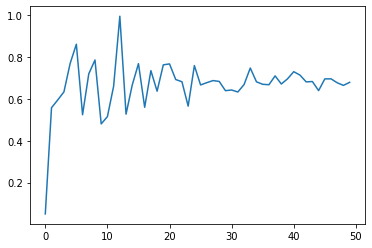

In [22]:
plt.plot(np.arange(0,50),gaet_train[5,:,2])

# **Next, set up an GAE architecture**

In [23]:
# Set up architurecture:
def GAE(input_size, hidden_size):
  inp = tf.keras.Input(shape=input_size)



  hidden1 = tf.keras.layers.Dense(units=hidden_size,
                                 kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
                                 #bias_initializer=initializers.Zeros(),
                                 activation="sigmoid",
                                 #activity_regularizer=tf.keras.regularizers.L1(0.01)
                                )(inp)

  #hidden1 = tf.keras.layers.Dense(units=25,
  #                               kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
  #                               #bias_initializer=initializers.Zeros(),
  #                               activation="sigmoid",
  #                              #activity_regularizer=tf.keras.regularizers.L1(0.01),
  #                              )(inputs)

  #hidden3 = tf.keras.layers.Dense(units=25,
  #                               kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
  #                               #bias_initializer=initializers.Zeros(),
  #                               activation="sigmoid",
  #                               #activity_regularizer=tf.keras.regularizers.L1(0.01)
  #                              )(hidden2)                              

  outp = tf.keras.layers.Dense(units=input_size,
                              kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
                              activation="sigmoid",
                              #activity_regularizer=tf.keras.regularizers.L1(0.01)
                            )(hidden1)
  md = tf.keras.Model(inputs=inp, outputs=outp)

  return md

# Define a model
model_gae=GAE(50,10)

In [24]:
model_gae.summary()
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='adam'
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Define a GAE_LDA loss function:
def my_loss_fn(y_true, y_pred):
    squared_difference1 = tf.square(y_true[:,:,0] - y_pred)
    squared_difference2 = tf.square(y_true[:,:,1] - y_pred)
    squared_difference3 = tf.square(y_true[:,:,2] - y_pred)
    squared_difference4 = tf.square(y_true[:,:,3] - y_pred)
    squared_difference5 = tf.square(y_true[:,:,4] - y_pred)
    squared_difference6 = tf.square(y_true[:,:,5] - y_pred)
    squared_difference7 = tf.square(y_true[:,:,6] - y_pred)
    
    mse1=tf.reduce_mean(squared_difference1, axis=-1)  # Note the `axis=-1`, MSE for the #1 adjacent distance (batch_size,1)
    mse2=tf.reduce_mean(squared_difference2, axis=-1) 
    mse3=tf.reduce_mean(squared_difference3, axis=-1)
    mse4=tf.reduce_mean(squared_difference4, axis=-1)
    mse5=tf.reduce_mean(squared_difference5, axis=-1)
    mse6=tf.reduce_mean(squared_difference6, axis=-1)
    mse7=tf.reduce_mean(squared_difference7, axis=-1)

    sum_mse=tf.math.add_n([mse1,mse2,mse3,mse4,mse5,mse6,mse7])
    final_mse=tf.math.divide(sum_mse,tf.constant([7.0]))
    return final_mse



In [26]:
model_gae.compile(optimizer=opt, loss=my_loss_fn)

In [27]:
history_gae=model_gae.fit(norm_train,
                 shuffle_gaet_train,
                 batch_size=32,
                 epochs=500,
                 shuffle=True,
                 initial_epoch=0)

Epoch 1/500
100/100 [==============================] - 1s 1ms/step - loss: 0.0275
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 8/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 9/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 10/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/500


**Visualize the loss**

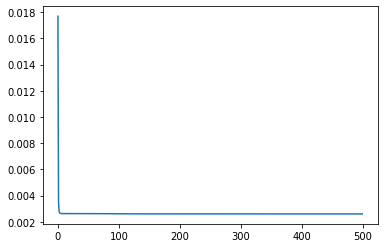

In [28]:
plt.plot(history_gae.history['loss'])

**Then, visualize hidden output**

In [29]:
# Check hidden outputs
hidden_layer_gae=model_gae.layers[1]
hidden_model_gae=tf.keras.Model(inputs=model_gae.input,outputs=hidden_layer_gae.output)

In [30]:
# Get training and testing sets hidden output:
H_train_dof1=hidden_model_gae.predict(norm_ori_dof1_train)
H_test_ori_dof1=hidden_model_gae.predict(norm_ori_dof1_test)
H_test_09k1_dof1=hidden_model_gae.predict(norm_09k1_dof1_test)

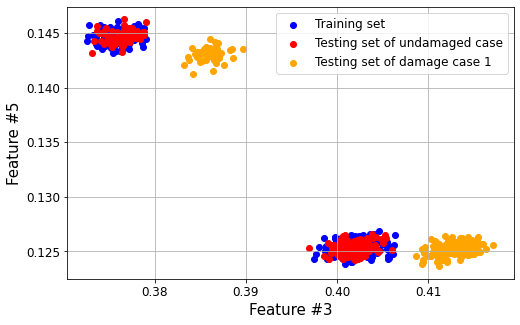

In [32]:
# Hidden output of 1-to-2 case
plt.figure(figsize=(8,5))
#plt.subplot(221)
f1=2;
f2=4;
plt.scatter(H_train_dof1[:,f1],H_train_dof1[:,f2], color='blue')
plt.scatter(H_test_ori_dof1[:,f1],H_test_ori_dof1[:,f2], color='red')
plt.scatter(H_test_09k1_dof1[:,f1],H_test_09k1_dof1[:,f2], color='orange')
plt.legend(['Training set','Testing set of undamaged case','Testing set of damage case 1'],fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Feature #'+str(f1+1),size=15)
plt.ylabel('Feature #'+str(f2+1),size=15)
plt.grid()
plt.show()

**Next, save the model**

In [ ]:
loc='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/model_gae'
loc_Z24='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae'
model_gae.save(loc_Z24)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae/assets


In [33]:
# serialize model to JSON
loc_Z24_json='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae.json'
loc_Z24_weights=loc_Z24='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/Z24_system/model_gae.h5'
model_json = model_gae.to_json()
with open(loc_Z24_json, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_gae.save_weights(loc_Z24_weights)
print("Saved model to disk")

Saved model to disk


In [ ]:
a=np.ones((2,2,7))
a[:,:,0]=a[:,:,0]+np.array([[1,1],[2,2]])
a[1,0,0]

3.0

In [ ]:

y_true=tf.convert_to_tensor(a, dtype=tf.float32)
y_pred=tf.zeros((2, 2))

In [ ]:
y_true[:,:,6]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
my_loss_fn(y_true,y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4285715, 2.142857 ], dtype=float32)>

In [ ]:
squared_difference1=tf.square(y_true[:,:,0],y_pred)
mean=tf.reduce_mean(squared_difference1,-1)
print(squared_difference1)
print(mean)

tf.Tensor(
[[4. 4.]
 [9. 9.]], shape=(2, 2), dtype=float32)
tf.Tensor([4. 9.], shape=(2,), dtype=float32)
